In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.shape

(962, 2)

In [6]:
df['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [7]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


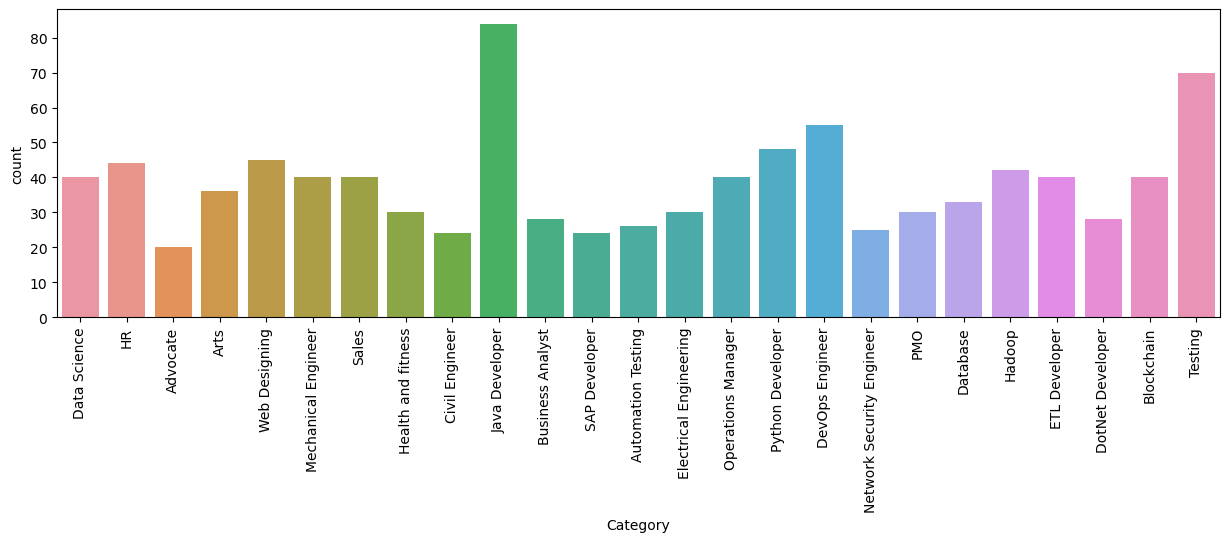

In [14]:
plt.figure(figsize=(15,4))
sns.countplot(df['Category'])
plt.xticks(rotation =90)
plt.show()

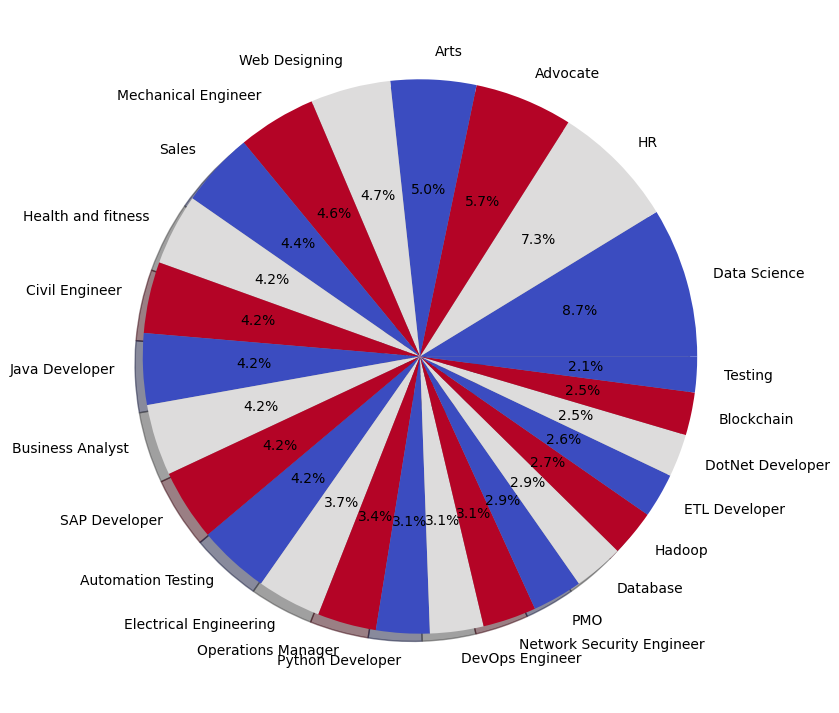

In [23]:
counts = df['Category'].value_counts()
levels = df['Category'].unique()
plt.figure(figsize=(15,9))
plt.pie(counts , labels = levels, autopct ='%1.1f%%', shadow = True, colors =plt.cm.coolwarm(np.linspace(0,1,3)))
plt.show()

## Explore Resume

In [32]:
df['Category'][0]

'Data Science'

In [33]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

## Cleaning Data

1. URLs
2. hastags
3. mentions,
4. special letters
5. punctuations

In [48]:
import re
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ', txt)
    cleanTxt = re.sub('RT|cc',' ', cleanTxt)
    cleanTxt = re.sub('#\S+\s',' ', cleanTxt)
    cleanTxt = re.sub('[%s]'%re.escape("""! "#$%&"()*+,-./:;<=>?@[\]^_`{|}~")"""), ' ', cleanTxt)
    cleanTxt = re.sub('r[^\x00-\x7f]',' ', cleanTxt)
    cleanTxt = re.sub('\s',' ', cleanTxt)
    
    return cleanTxt

In [51]:
df['Cleaned_Resume'] =df['Resume'].apply(lambda x : cleanResume(x))

In [52]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E ...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad...


In [53]:
df["Cleaned_Resume"][0]

'Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  NaÃ¯ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details     Data Science Assurance Associate     Data Science Assurance Associate   Ernst   Young LLP  Skill Details   JAVASCRIPT  Exprience   24 months  jQuery  Exprience   24 months  Python  Exprience   24 monthsCompany Details   company   Ernst   Young LLP  description   Fraud Investigations and Dispute Servi

In [58]:
df.drop("Resume", axis=1, inplace=True)

In [59]:
df.head()

,Category,Cleaned_Resume
0,Data Science,Skills Programming Languages Python pandas...
1,Data Science,Education Details May 2013 to May 2017 B E ...
2,Data Science,Areas of Interest Deep Learning Control Syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Education Details MCA YMCAUST Faridabad...


In [60]:
df["Resume"] = df['Cleaned_Resume']

In [62]:
df.drop("Cleaned_Resume", axis=1, inplace=True)

In [63]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas...
1,Data Science,Education Details May 2013 to May 2017 B E ...
2,Data Science,Areas of Interest Deep Learning Control Syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Education Details MCA YMCAUST Faridabad...


## word into categorical values 

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [65]:
le.fit(df['Category'])
df['Category_Wise'] = le.transform(df['Category'])

In [102]:
df.head(9)

,Category,Resume,Category_Wise
0,Data Science,Skills Programming Languages Python pandas...,6
1,Data Science,Education Details May 2013 to May 2017 B E ...,6
2,Data Science,Areas of Interest Deep Learning Control Syste...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,6
4,Data Science,Education Details MCA YMCAUST Faridabad...,6
5,Data Science,SKILLS C Basics IOT Python MATLAB Data Sci...,6
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...,6
7,Data Science,Education Details B Tech Rayat and Bahra ...,6
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...,6


## Vectorization

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words="english")

In [70]:
tfidf.fit(df['Resume'])
requiredTask = tfidf.transform(df['Resume'])

## Splitting

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredTask, df['Category_Wise'],test_size=0.2,random_state= 42)

In [78]:
X_train.shape

(769, 7382)

In [82]:
X_test.shape

(193, 7382)

### Now lets train the model and print the classification report  

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())

In [90]:
clf.fit(X_train,y_train)
ypred = clf.predict(X_test)
print(accuracy_score(y_test, ypred))

0.9844559585492227


## Prediction system

In [91]:
import pickle
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl','wb'))

In [99]:
myResume = """Results-driven DevOps Engineer with a proven track record of implementing robust, 
              scalable, and automated infrastructure solutions. 
              Adept at leveraging DevOps practices to streamline development workflows, 
              enhance system reliability, and accelerate software delivery. 
              Skilled in configuration management, containerization, and 
              continuous integration/continuous deployment (CI/CD) pipelines. 
              Experienced in cloud platforms such as AWS and Azure. 
              Strong collaborator with cross-functional teams to bridge the gap between development and operations. 
              Seeking to contribute expertise in optimizing and 
              automating deployment pipelines for efficient software delivery in a dynamic DevOps role."""

In [114]:
import pickle
# load the trained classifier 
clf = pickle.load(open('clf.pkl','rb'))

# clean the input resume 
cleaned_Resume = cleanResume(myResume)
# transform the cleaned resume using the trained TfidVecttorizer
input_features = tfidf.transform([cleaned_Resume])
# make the prediction using the load classifier
prediction_id = clf.predict(input_features)[0]
# map category id to category name 
category_mapping = {
    6:'Data Science',
    12:'HR', 
    0:'Advocate',
    1:'Arts', 
    24:'Web Designing',
    16:'Mechanical Engineer', 
    22:'Sales', 
    14:'Health and fitness',
    5:'Civil Engineer', 
    15:'Java Developer', 
    4:'Business Analyst',
    21:'SAP Developer', 
    2:'Automation Testing',
    18:'Operations Manager',
    11:'Electrical Engineering',
    20:'Python Developer', 
    8:'DevOps Engineer',
    17:'Network Security Engineer', 
    19:'PMO', 
    7:'Database', 
    13:'Hadoop',
    10:'ETL Developer', 
    19:'DotNet Developer', 
    3:'Blockchain', 
    23:'Testing'
    
}
category_name = category_mapping.get(prediction_id, 'Unknown')
print("Predicted Category:",category_name)
print(prediction_id)

Predicted Category: DevOps Engineer
8
